# <font color=blue>Assignments for "Feature Engineering - Part 2"</font>

In this assignment, you are going to use a dataset related to the US education system. Please download the ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)) from Kaggle. You are going to use `states_all.csv` within this dataset.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [4]:
states=pd.read_csv("states_all.csv")
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [5]:
states.shape

(1715, 25)

In [6]:
for i in states.columns[3:]:
  states[i] = states[i].fillna(states.groupby('STATE')[i].transform('mean'))
  states[i] = states[i].fillna(states[i].mean())

**(1)** Create a variable that contains the weighted average of the grades in the dataset. The number of students in the fourth grade is different from that of the eighth grade. So you will need a weighted average!

In [7]:
mean4=((states.AVG_MATH_4_SCORE+states.AVG_READING_4_SCORE)*states.GRADES_4_G)/states.GRADES_ALL_G
mean8=((states.AVG_MATH_8_SCORE+states.AVG_READING_8_SCORE)*states.GRADES_8_G)/states.GRADES_ALL_G

In [8]:
display(mean4)
mean8

0       32.869468
1       35.388332
2       34.898879
3       33.024694
4       32.646332
          ...    
1710    35.720699
1711    35.340839
1712    32.491760
1713    33.172811
1714    36.257581
Length: 1715, dtype: float64

0       40.209551
1       38.627868
2       38.161060
3       41.992157
4       35.673892
          ...    
1710    41.307016
1711    41.804413
1712    40.529767
1713    40.713692
1714    42.829487
Length: 1715, dtype: float64

In [9]:
mean48=((states.AVG_MATH_8_SCORE+states.AVG_READING_8_SCORE)*states.GRADES_8_G +(states.AVG_MATH_4_SCORE+states.AVG_READING_4_SCORE)*states.GRADES_4_G)/states.GRADES_ALL_G
mean48

0       73.079019
1       74.016200
2       73.059939
3       75.016851
4       68.320223
          ...    
1710    77.027715
1711    77.145251
1712    73.021527
1713    73.886503
1714    79.087068
Length: 1715, dtype: float64

In [10]:
states["weighted_average"]=mean48
states

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,weighted_average
0,1992_ALABAMA,ALABAMA,1992,7.365843e+05,2678885.00,304177.00,1659028.00,715680.00,2653798.00,1481703.00,735036.00,4.613081e+05,174053.00,8224.000000,55460.00000,57948.00000,58025.00000,41167.00000,464653.65,2.133993e+05,7.316340e+05,208.000000,252.0,207.000000,255.000000,73.079019
1,1992_ALASKA,ALASKA,1992,1.304296e+05,1049591.00,106780.00,720711.00,222100.00,972488.00,498362.00,350902.00,5.982192e+04,37451.00,2371.000000,10152.00000,9748.00000,8789.00000,6714.00000,80658.50,3.961205e+04,1.224870e+05,234.777778,280.0,209.888889,258.333333,74.016200
2,1992_ARIZONA,ARIZONA,1992,8.743221e+05,3258079.00,297888.00,1369815.00,1590376.00,3401580.00,1435908.00,1007732.00,3.344099e+05,609114.00,2544.000000,53497.00000,55433.00000,49081.00000,37410.00000,632177.35,3.001561e+05,6.734770e+05,215.000000,265.0,209.000000,258.636364,73.059939
3,1992_ARKANSAS,ARKANSAS,1992,4.519019e+05,1711959.00,178571.00,958785.00,574603.00,1743022.00,964323.00,483488.00,2.537191e+05,145212.00,808.000000,33511.00000,34632.00000,36011.00000,27651.00000,288069.95,1.368237e+05,4.414900e+05,210.000000,256.0,211.000000,258.818182,75.016851
4,1992_CALIFORNIA,CALIFORNIA,1992,5.945343e+06,26260025.00,2072470.00,16546514.00,7641041.00,27138832.00,14358922.00,8520926.00,2.907487e+06,2044688.00,59067.000000,431763.00000,418418.00000,363296.00000,270675.00000,3783631.40,1.883045e+06,5.254844e+06,208.000000,261.0,202.000000,255.000000,68.320223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,1.179632e+06,11237280.32,759245.56,4418365.64,6059669.12,11456358.48,6072911.24,3479311.16,4.820910e+05,1017358.72,15682.468750,87013.15625,87309.09375,86618.75000,75575.43750,737688.60,3.625800e+05,1.151226e+06,247.000000,287.0,224.000000,262.000000,77.027715
1711,2019_WASHINGTON,WASHINGTON,2019,1.010687e+06,9295918.12,752469.48,5764736.68,2778711.96,9481863.84,4624236.92,2809570.56,4.154238e+05,1282112.24,8459.250000,72424.25000,75210.43750,74138.21875,70990.21875,625748.60,3.246117e+05,9.789468e+05,240.000000,286.0,220.000000,266.000000,77.145251
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,2.891283e+05,2664419.00,287330.80,1564013.72,813074.48,2670432.28,1470191.08,825450.64,1.760134e+05,185668.60,7927.031250,21715.81250,21735.93750,22799.65625,20056.43750,168134.40,8.321148e+04,2.970217e+05,231.000000,272.0,213.000000,256.000000,73.021527
1713,2019_WISCONSIN,WISCONSIN,2019,8.671074e+05,8944846.84,572206.44,4404704.20,3967936.20,8995488.76,4762572.92,2751990.64,3.625247e+05,675102.72,30740.593750,60496.65625,61357.46875,62573.84375,64291.00000,497802.35,2.780265e+05,8.545297e+05,242.000000,289.0,220.000000,267.000000,73.886503


**(2)** What is the correlation between the variable you just created and the types of expenditures? Which expenditure item has more correlation than others?

In [11]:
states.corr()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,weighted_average
YEAR,1.000000,0.018017,0.136870,0.161779,0.127470,0.130846,0.132936,0.132117,0.143210,0.103798,0.095397,0.204369,0.040037,0.049839,0.067423,0.108853,0.004339,0.015211,0.058203,0.205710,0.189833,0.109818,0.035845,0.047097
ENROLL,0.018017,1.000000,0.918653,0.904637,0.919094,0.851259,0.919163,0.885881,0.922706,0.961598,0.924603,0.770783,0.991851,0.991641,0.988732,0.970190,0.996053,0.994857,0.991826,-0.044695,-0.081813,-0.089770,-0.106128,-0.126287
TOTAL_REVENUE,0.136870,0.918653,1.000000,0.933126,0.973043,0.965067,0.999168,0.990623,0.995103,0.942301,0.933227,0.714192,0.905029,0.905675,0.913848,0.937047,0.898610,0.912550,0.916402,0.051252,0.005263,0.014270,-0.019908,-0.133546
FEDERAL_REVENUE,0.161779,0.904637,0.933126,1.000000,0.928591,0.852990,0.933212,0.898871,0.936009,0.944872,0.922043,0.742550,0.898161,0.892895,0.900383,0.927651,0.886190,0.898150,0.900767,-0.030285,-0.081607,-0.105807,-0.143663,-0.155055
STATE_REVENUE,0.127470,0.919094,0.973043,0.928591,1.000000,0.880942,0.970618,0.955268,0.969527,0.947839,0.922484,0.654802,0.911116,0.906929,0.913418,0.939368,0.900556,0.916666,0.915052,0.009417,-0.032021,-0.042525,-0.073609,-0.137888
LOCAL_REVENUE,0.130846,0.851259,0.965067,0.852990,0.880942,1.000000,0.965722,0.970037,0.957539,0.864529,0.875467,0.714188,0.831481,0.838191,0.847588,0.865399,0.830889,0.841978,0.851328,0.106533,0.060532,0.095458,0.061504,-0.114562
TOTAL_EXPENDITURE,0.132936,0.919163,0.999168,0.933212,0.970618,0.965722,1.000000,0.991684,0.993535,0.941237,0.939717,0.718459,0.904543,0.905798,0.914168,0.935987,0.898651,0.912268,0.916753,0.049269,0.003994,0.012349,-0.022445,-0.134036
INSTRUCTION_EXPENDITURE,0.132117,0.885881,0.990623,0.898871,0.955268,0.970037,0.991684,1.000000,0.977400,0.905614,0.905468,0.678644,0.870390,0.872144,0.880396,0.902014,0.864645,0.878993,0.884175,0.052915,0.009696,0.030816,-0.005828,-0.135017
SUPPORT_SERVICES_EXPENDITURE,0.143210,0.922706,0.995103,0.936009,0.969527,0.957539,0.993535,0.977400,1.000000,0.948480,0.926917,0.717676,0.909782,0.909250,0.917837,0.943580,0.902505,0.917444,0.920009,0.051931,0.005682,0.012796,-0.017476,-0.138009
OTHER_EXPENDITURE,0.103798,0.961598,0.942301,0.944872,0.947839,0.864529,0.941237,0.905614,0.948480,1.000000,0.925007,0.740820,0.954470,0.949648,0.952340,0.961757,0.949505,0.958435,0.953869,-0.024773,-0.075819,-0.071448,-0.104726,-0.144525


Expenditures and weigthed mean correlated with negatively.

OTHER_EXPENDITURE is the more correlation than other expenture values between the weighted_mean. (0.144525)

**(3)** Now apply the Principal Components Analysis (PCA) for the four expenditure items! How much of the total variance can be explained by the first component?

In [12]:
ex=states.loc[:,"TOTAL_EXPENDITURE":"OTHER_EXPENDITURE"]

In [13]:
states_df=ex.select_dtypes(exclude='object')
states_df.dropna(inplace=True)

In [14]:
X=states_df.values

In [15]:
len(states_df.columns)

4

In [16]:
X = StandardScaler().fit_transform(states_df)
pca = PCA(n_components=4)
principalComponents=pca.fit_transform(X)

In [17]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[9.69922684e-01 2.60685655e-02 3.56632384e-03 4.42426929e-04]
[ 96.99  99.6   99.96 100.  ]


Text(0, 0.5, '% of Variance Explained')

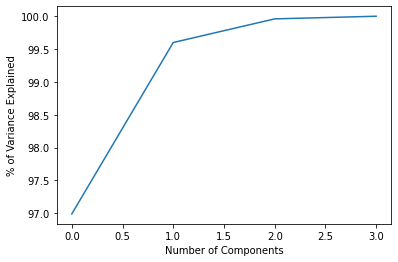

In [18]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')

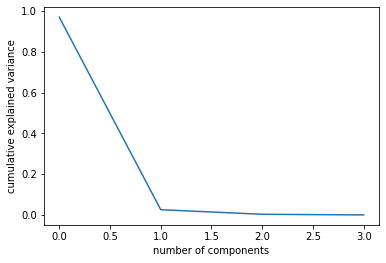

In [19]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

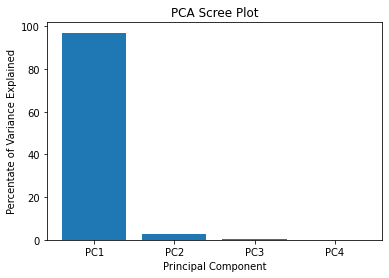

In [20]:
# Scree Plot
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2','PC3','PC4']
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

**Firs component (total expenditure) explains total variance approximately %97.**

**(4)** What is the correlation between the GPA you created and the first principal component?

In [21]:
states.corr()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,weighted_average
YEAR,1.000000,0.018017,0.136870,0.161779,0.127470,0.130846,0.132936,0.132117,0.143210,0.103798,0.095397,0.204369,0.040037,0.049839,0.067423,0.108853,0.004339,0.015211,0.058203,0.205710,0.189833,0.109818,0.035845,0.047097
ENROLL,0.018017,1.000000,0.918653,0.904637,0.919094,0.851259,0.919163,0.885881,0.922706,0.961598,0.924603,0.770783,0.991851,0.991641,0.988732,0.970190,0.996053,0.994857,0.991826,-0.044695,-0.081813,-0.089770,-0.106128,-0.126287
TOTAL_REVENUE,0.136870,0.918653,1.000000,0.933126,0.973043,0.965067,0.999168,0.990623,0.995103,0.942301,0.933227,0.714192,0.905029,0.905675,0.913848,0.937047,0.898610,0.912550,0.916402,0.051252,0.005263,0.014270,-0.019908,-0.133546
FEDERAL_REVENUE,0.161779,0.904637,0.933126,1.000000,0.928591,0.852990,0.933212,0.898871,0.936009,0.944872,0.922043,0.742550,0.898161,0.892895,0.900383,0.927651,0.886190,0.898150,0.900767,-0.030285,-0.081607,-0.105807,-0.143663,-0.155055
STATE_REVENUE,0.127470,0.919094,0.973043,0.928591,1.000000,0.880942,0.970618,0.955268,0.969527,0.947839,0.922484,0.654802,0.911116,0.906929,0.913418,0.939368,0.900556,0.916666,0.915052,0.009417,-0.032021,-0.042525,-0.073609,-0.137888
LOCAL_REVENUE,0.130846,0.851259,0.965067,0.852990,0.880942,1.000000,0.965722,0.970037,0.957539,0.864529,0.875467,0.714188,0.831481,0.838191,0.847588,0.865399,0.830889,0.841978,0.851328,0.106533,0.060532,0.095458,0.061504,-0.114562
TOTAL_EXPENDITURE,0.132936,0.919163,0.999168,0.933212,0.970618,0.965722,1.000000,0.991684,0.993535,0.941237,0.939717,0.718459,0.904543,0.905798,0.914168,0.935987,0.898651,0.912268,0.916753,0.049269,0.003994,0.012349,-0.022445,-0.134036
INSTRUCTION_EXPENDITURE,0.132117,0.885881,0.990623,0.898871,0.955268,0.970037,0.991684,1.000000,0.977400,0.905614,0.905468,0.678644,0.870390,0.872144,0.880396,0.902014,0.864645,0.878993,0.884175,0.052915,0.009696,0.030816,-0.005828,-0.135017
SUPPORT_SERVICES_EXPENDITURE,0.143210,0.922706,0.995103,0.936009,0.969527,0.957539,0.993535,0.977400,1.000000,0.948480,0.926917,0.717676,0.909782,0.909250,0.917837,0.943580,0.902505,0.917444,0.920009,0.051931,0.005682,0.012796,-0.017476,-0.138009
OTHER_EXPENDITURE,0.103798,0.961598,0.942301,0.944872,0.947839,0.864529,0.941237,0.905614,0.948480,1.000000,0.925007,0.740820,0.954470,0.949648,0.952340,0.961757,0.949505,0.958435,0.953869,-0.024773,-0.075819,-0.071448,-0.104726,-0.144525


**-0.134036**

**(5)** When you need to choose the most appropriate variables for your model, would you prefer the first basic variables instead of the expenditure items? Why?

In [22]:
X = pd.DataFrame(X, columns=ex.columns)

In [23]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig = plt.figure(figsize=(20,6), dpi=100)
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

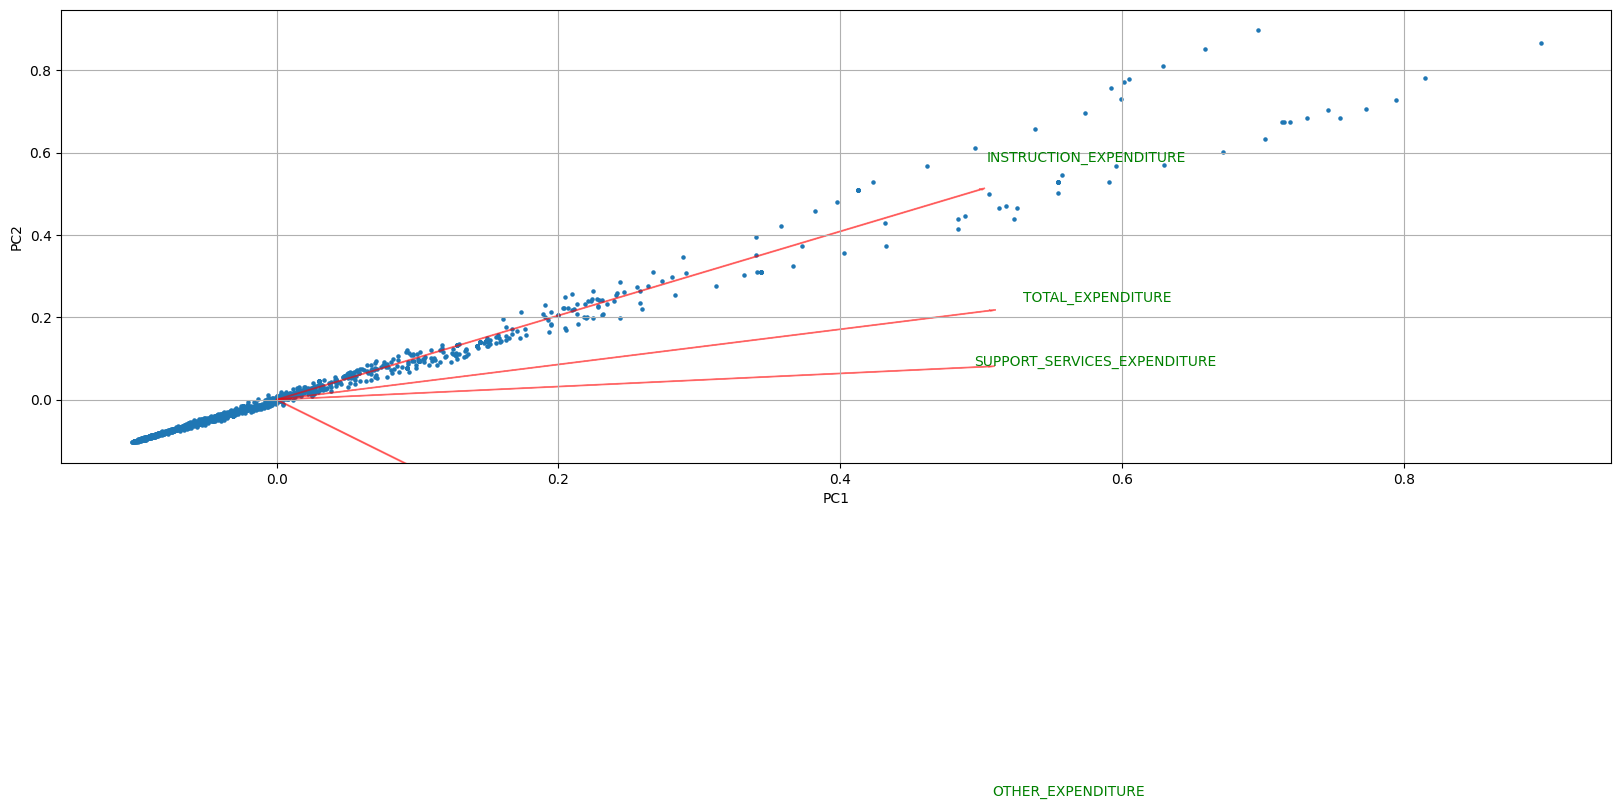

In [24]:
myplot(np.array(X)[:,0:2],np.transpose(pca.components_[0:2, :]),list(X.columns))
plt.show()

**INSTRUCTION EXPENDITURE item is preffered because the line is so close to points than others.**